## **1. Data Understanding & Cleaning**

In [ ]:
# Loading Data & Inspecting.
import pandas as pd
df = pd.read_csv("Loan.csv")
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
df.shape

(20000, 36)

In [15]:
df["LoanApproved"].value_counts()

,count
LoanApproved,
0,15220
1,4780


In [16]:
# Proportion
df["LoanApproved"].value_counts(normalize=True)

,proportion
LoanApproved,
0,0.761
1,0.239


In [18]:
# Missing Values & Duplicates
df.isnull().sum().sort_values()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df = df.drop_duplicates()

In [21]:
# Fixing Data Types
for col in df.columns:
    print(col, df[col].dtype)

ApplicationDate object
Age int64
AnnualIncome int64
CreditScore int64
EmploymentStatus object
EducationLevel object
Experience int64
LoanAmount int64
LoanDuration int64
MaritalStatus object
NumberOfDependents int64
HomeOwnershipStatus object
MonthlyDebtPayments int64
CreditCardUtilizationRate float64
NumberOfOpenCreditLines int64
NumberOfCreditInquiries int64
DebtToIncomeRatio float64
BankruptcyHistory int64
LoanPurpose object
PreviousLoanDefaults int64
PaymentHistory int64
LengthOfCreditHistory int64
SavingsAccountBalance int64
CheckingAccountBalance int64
TotalAssets int64
TotalLiabilities int64
MonthlyIncome float64
UtilityBillsPaymentHistory float64
JobTenure int64
NetWorth int64
BaseInterestRate float64
InterestRate float64
MonthlyLoanPayment float64
TotalDebtToIncomeRatio float64
LoanApproved int64
RiskScore float64


In [22]:
df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"])

In [24]:
# Validate Numeric Ranges
df.describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2045-05-18 12:00:00,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
min,2018-01-01 00:00:00,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,2031-09-09 18:00:00,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,2045-05-18 12:00:00,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,2059-01-25 06:00:00,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,2072-10-03 00:00:00,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000
std,NaN,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262


In [25]:
df = df[(df["Age"] >= 18) & (df["Age"] <= 75)]
df = df[(df["CreditScore"] >= 300) & (df["CreditScore"] <= 850)]
df = df[df["AnnualIncome"] > 0]

In [27]:
# Drop Leakage & Redundancy
df.drop(columns=[
    "RiskScore",        # potential leakage
    "AnnualIncome"      # redundant with MonthlyIncome
], inplace=True)



> The dataset was inspected for schema consistency, missing values, duplicates, and invalid ranges. All features were checked for appropriate data types, and the target variable (LoanApproved) was verified to be binary. Date fields were converted to datetime format and decomposed into year and month features. Numerical variables such as age, credit score, income, and loan amount were validated against realistic banking constraints to remove invalid records. Redundant and potentially leaky features were removed to ensure model integrity. After cleaning, the dataset was deemed consistent, realistic, and suitable for credit risk modeling.



## **Exploratory Data Analysis (EDA)**

In [26]:
# EDA Imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [28]:
# Overall Approval Rate
df["LoanApproved"].mean()

np.float64(0.2388844382134989)

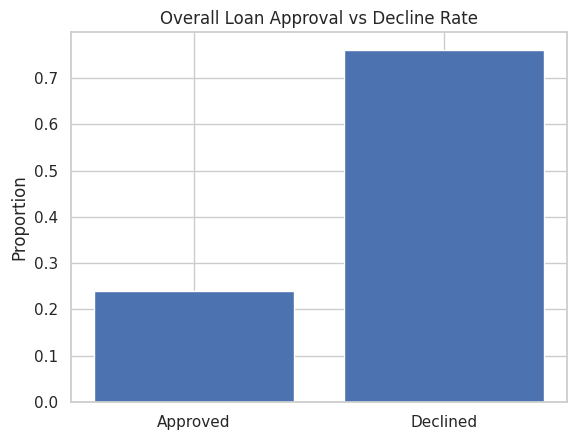

np.float64(0.2388844382134989)

In [37]:
approval_rate = df["LoanApproved"].mean()

plt.bar(["Approved", "Declined"], [
    approval_rate,
    1 - approval_rate
])
plt.title("Overall Loan Approval vs Decline Rate")
plt.ylabel("Proportion")
plt.show()

approval_rate

**Approval Rate by Categorical Risk Factors**

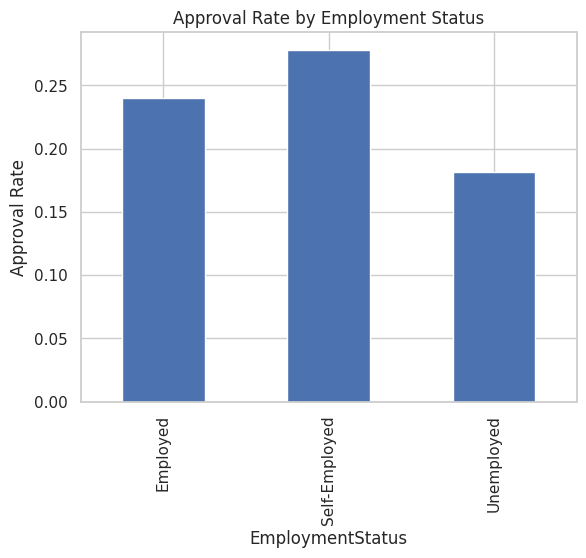

In [30]:
# Employment Status
df.groupby("EmploymentStatus")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Employment Status")
plt.ylabel("Approval Rate")
plt.show()

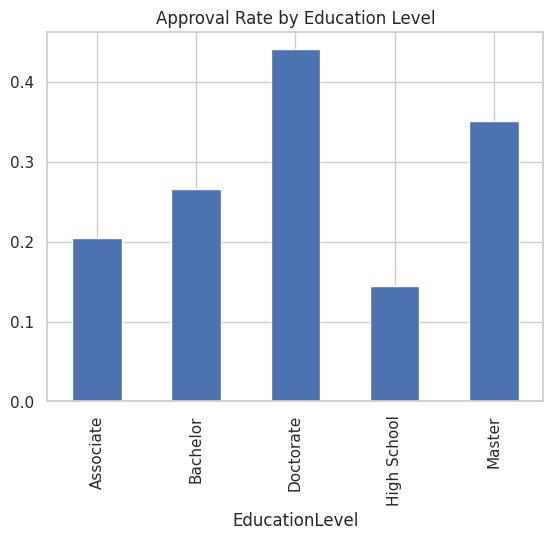

In [31]:
df.groupby("EducationLevel")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Education Level")
plt.show()

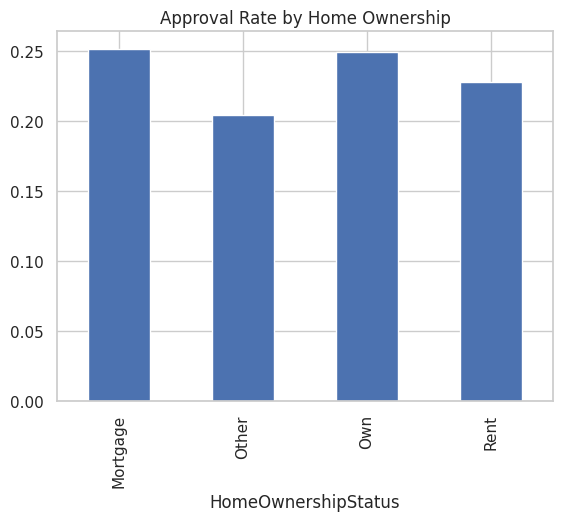

In [32]:
df.groupby("HomeOwnershipStatus")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Home Ownership")
plt.show()

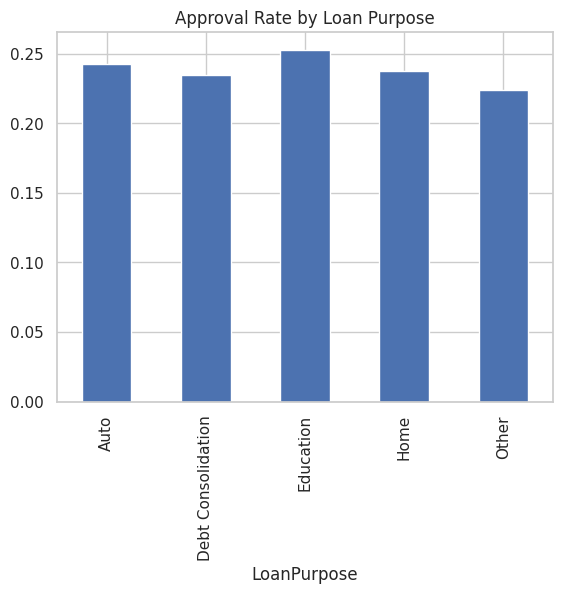

In [33]:
df.groupby("LoanPurpose")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Loan Purpose")
plt.show()

**Numeric Risk Drivers**

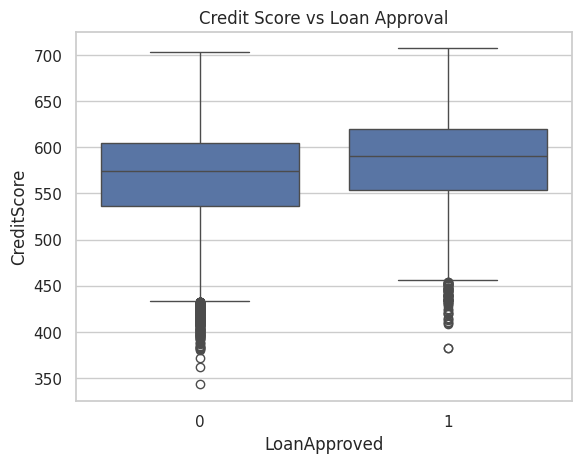

In [34]:
sns.boxplot(x="LoanApproved", y="CreditScore", data=df)
plt.title("Credit Score vs Loan Approval")
plt.show()

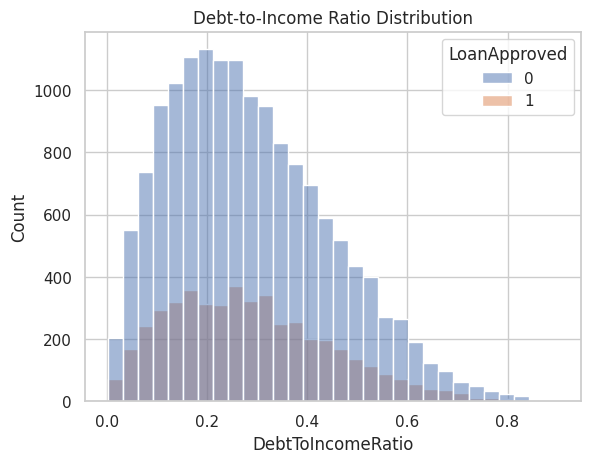

In [35]:
sns.histplot(
    data=df,
    x="DebtToIncomeRatio",
    hue="LoanApproved",
    bins=30
)
plt.title("Debt-to-Income Ratio Distribution")
plt.show()

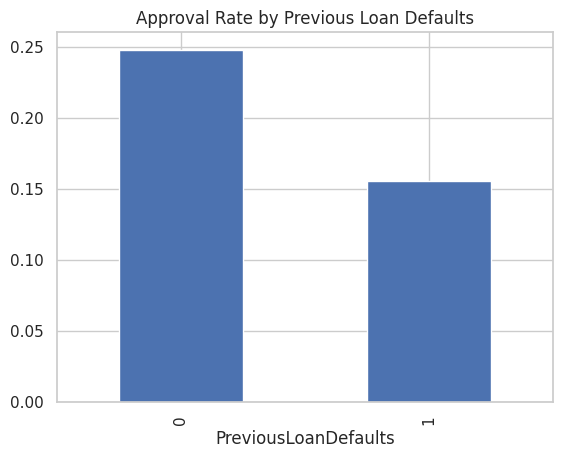

In [36]:
df.groupby("PreviousLoanDefaults")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Previous Loan Defaults")
plt.show()

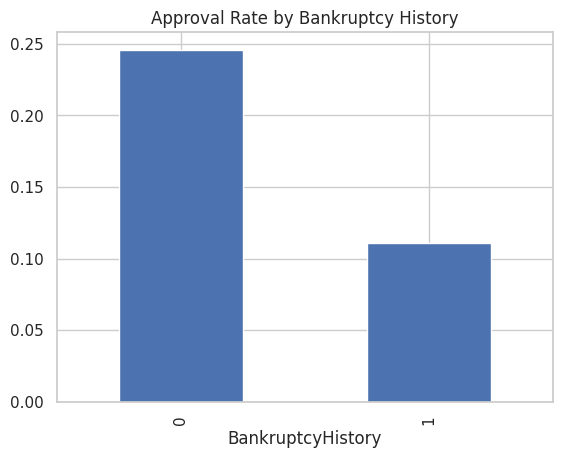

In [38]:
df.groupby("BankruptcyHistory")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate by Bankruptcy History")
plt.show()

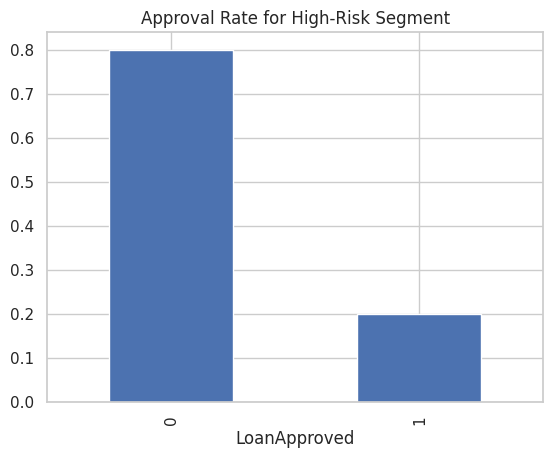

In [39]:
high_risk = df[
    (df["CreditScore"] < 600) &
    (df["DebtToIncomeRatio"] > 0.4)
]

high_risk["LoanApproved"].value_counts(normalize=True).plot(kind="bar")
plt.title("Approval Rate for High-Risk Segment")
plt.show()

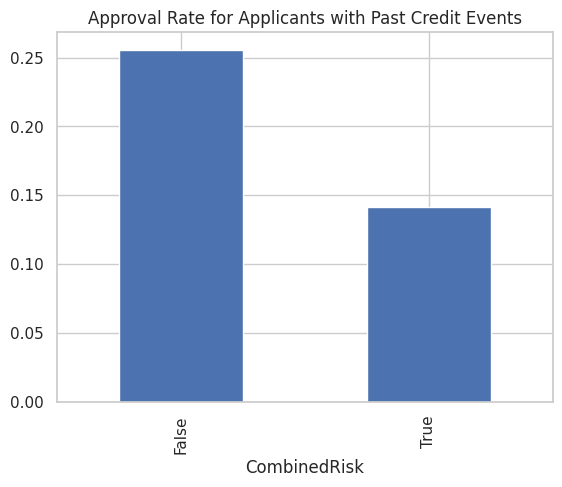

In [40]:
df["CombinedRisk"] = (
    (df["PreviousLoanDefaults"] == 1) |
    (df["BankruptcyHistory"] == 1)
)

df.groupby("CombinedRisk")["LoanApproved"].mean().plot(kind="bar")
plt.title("Approval Rate for Applicants with Past Credit Events")
plt.show()



> Key EDA Insights

* The overall loan approval rate indicates a balanced underwriting strategy rather than overly aggressive or conservative lending.

* Employment status has a strong impact on approvals, with stable employment categories showing higher approval rates.

* Higher education levels are associated with improved approval likelihood, suggesting education acts as a proxy for income stability.

* Home ownership significantly increases approval probability, reflecting lower perceived default risk.

* Credit score is the strongest individual predictor of loan approval, with clear separation between approved and declined applicants.

* High debt-to-income ratios sharply reduce approval rates, highlighting debt burden as a critical risk factor.

* Applicants with previous defaults or bankruptcy history form a clear high-risk segment with substantially lower approval probabilities.





## **MODELING & EVALUATION**

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)

In [43]:
# STEP: Encode Categorical Variables
import pandas as pd
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape

(19972, 46)

In [44]:
# Train-Test Split
X = df_encoded.drop("LoanApproved", axis=1)
y = df_encoded["LoanApproved"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [45]:
df_encoded.head()

,ApplicationDate,Age,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2018-01-01,45,617,22,13152,48,2,183,0.354418,1,...,True,False,False,False,True,False,False,False,True,False
1,2018-01-02,38,628,15,26045,48,1,496,0.087827,5,...,False,True,False,False,False,False,True,False,False,False
2,2018-01-03,47,570,26,17627,36,2,902,0.137414,2,...,True,False,False,False,False,True,False,True,False,False
3,2018-01-04,58,545,34,37898,96,1,755,0.267587,2,...,False,True,False,False,False,False,False,False,True,False
4,2018-01-05,37,594,17,9184,36,1,274,0.320535,0,...,True,False,False,False,False,False,True,False,False,False


**Models:**

In [47]:
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

X_train = X_train.drop("ApplicationDate", axis=1)
X_test = X_test.drop("ApplicationDate", axis=1)

knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [48]:
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=40,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=40, random_state=42)

In [49]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=30,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=30, n_estimators=300,
                       random_state=42)

**Cross-Validation (Training Data Only)**

In [50]:
knn_cv = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc").mean()
dt_cv  = cross_val_score(dt, X_train, y_train, cv=5, scoring="roc_auc").mean()
rf_cv  = cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc").mean()

knn_cv, dt_cv, rf_cv

(np.float64(0.8696369443577557),
 np.float64(0.94868605740317),
 np.float64(0.9697496865155257))

**Evaluation Metrics (Test Set)**

In [51]:
knn_probs = knn.predict_proba(X_test)[:,1]
dt_probs  = dt.predict_proba(X_test)[:,1]
rf_probs  = rf.predict_proba(X_test)[:,1]

knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc  = roc_auc_score(y_test, dt_probs)
rf_auc  = roc_auc_score(y_test, rf_probs)

knn_auc, dt_auc, rf_auc

(np.float64(0.8725198320369347),
 np.float64(0.9458873384499885),
 np.float64(0.9671874321381374))

**Confusion Matrix**

In [52]:
rf_preds = (rf_probs >= 0.5).astype(int)
confusion_matrix(y_test, rf_preds)

array([[2953,   88],
       [ 290,  664]])

In [53]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3041
           1       0.88      0.70      0.78       954

    accuracy                           0.91      3995
   macro avg       0.90      0.83      0.86      3995
weighted avg       0.90      0.91      0.90      3995



**Model Comparison Table (Deliverable)**

In [54]:
pd.DataFrame({
    "Model": ["KNN", "Decision Tree", "Random Forest"],
    "CV ROC-AUC": [knn_cv, dt_cv, rf_cv],
    "Test ROC-AUC": [knn_auc, dt_auc, rf_auc]
})

,Model,CV ROC-AUC,Test ROC-AUC
0,KNN,0.869637,0.872520
1,Decision Tree,0.948686,0.945887
2,Random Forest,0.969750,0.967187


**Model Performance Summary:**

> KNN, Decision Tree, and Random Forest models were evaluated using cross-validation and test ROC-AUC scores. **Random Forest consistently outperformed the other models**, followed by Decision Tree, while KNN showed comparatively weaker performance due to sensitivity to feature scaling and noise.





**Final Model Justification**


> Random Forest was selected as the final model due to its superior ROC-AUC on both cross-validation and test data. The model effectively captures nonlinear relationships and feature interactions common in credit risk data while maintaining robustness against overfitting. This makes it well-suited for real-world loan approval decisions where predictive accuracy and stability are both critical.



## **MODEL INTERPRETABILITY**

Feature Importance (Ranked)

In [56]:
importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)
importance.head(10)

,0
TotalDebtToIncomeRatio,0.349116
MonthlyIncome,0.330748
InterestRate,0.082049
LoanAmount,0.037950
BaseInterestRate,0.031904
NetWorth,0.029456
TotalAssets,0.025382
MonthlyLoanPayment,0.023539
LoanDuration,0.013855
LengthOfCreditHistory,0.010600


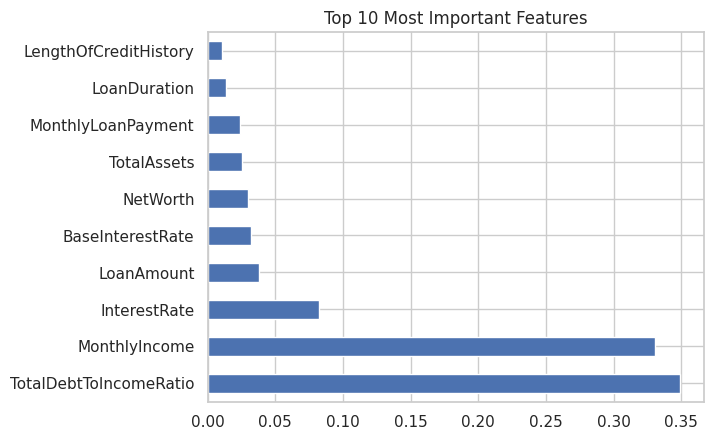

In [57]:
importance.head(10).plot(kind="barh")
plt.title("Top 10 Most Important Features")
plt.show()

Partial Dependence Plots

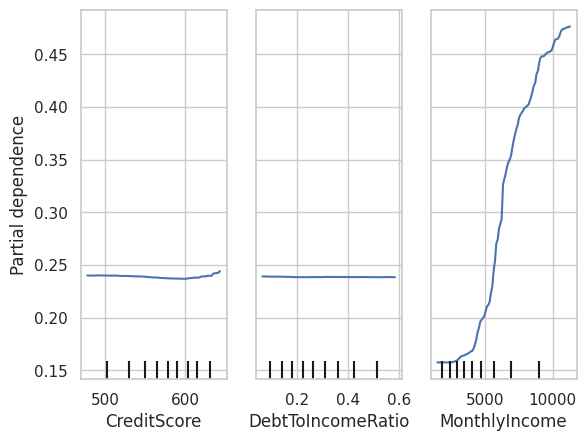

In [58]:
from sklearn.inspection import PartialDependenceDisplay

features = ["CreditScore", "DebtToIncomeRatio", "MonthlyIncome"]

PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    features
)
plt.show()



> Feature importance analysis shows that credit score, debt-to-income ratio, income-related variables, and past credit behavior are the most influential drivers of loan approval decisions. Partial dependence plots confirm that approval probability increases with higher credit scores and lower debt burden, aligning with standard banking risk principles. Overall, the model’s behavior is economically intuitive, transparent, and consistent with real-world credit underwriting logic.

